CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary

import model as model
import utils as utils
from model import Net
from utils import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
norm_mean,norm_std = 0.1307,0.3081
train_transforms, test_transforms = get_transforms(norm_mean,norm_std)

CODE BLOCK: 4

In [4]:
train_data,test_data = get_datasets(train_transforms,test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

train_loader, test_loader = get_dataloaders(batch_size, train_data, test_data)


CUDA Available? True


CODE BLOCK: 6

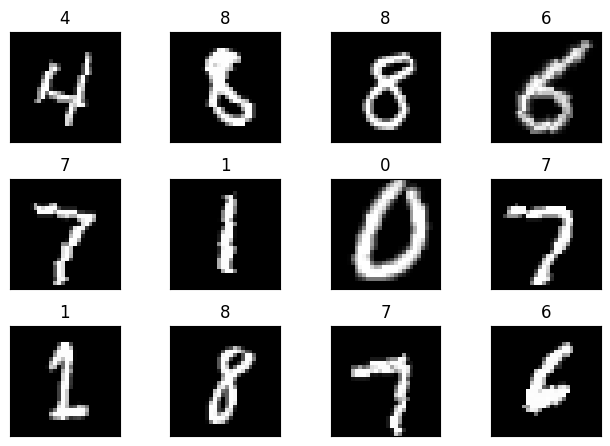

In [6]:
show_sample_images(train_loader)


CODE BLOCK: 7

CODE BLOCK: 8

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [8]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.cross_entropy
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
  test(model, device, test_loader, criterion, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.9934 Batch_id=117 Accuracy=32.56: 100%|██████████| 118/118 [00:35<00:00,  3.34it/s]


Test set: Average loss: 0.7744, Accuracy: 7756/10000 (77.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2080 Batch_id=117 Accuracy=89.78: 100%|██████████| 118/118 [00:25<00:00,  4.60it/s]


Test set: Average loss: 0.1172, Accuracy: 9660/10000 (96.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0161 Batch_id=117 Accuracy=95.52: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]


Test set: Average loss: 0.0797, Accuracy: 9750/10000 (97.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0619 Batch_id=117 Accuracy=96.73: 100%|██████████| 118/118 [00:26<00:00,  4.51it/s]


Test set: Average loss: 0.0539, Accuracy: 9826/10000 (98.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0780 Batch_id=117 Accuracy=97.37: 100%|██████████| 118/118 [00:26<00:00,  4.43it/s]


Test set: Average loss: 0.0422, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0323 Batch_id=117 Accuracy=97.49: 100%|██████████| 118/118 [00:25<00:00,  4.65it/s]


Test set: Average loss: 0.0544, Accuracy: 9820/10000 (98.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1109 Batch_id=117 Accuracy=97.93: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.0362, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0773 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [00:26<00:00,  4.53it/s]


Test set: Average loss: 0.0366, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0626 Batch_id=117 Accuracy=98.21: 100%|██████████| 118/118 [00:25<00:00,  4.54it/s]


Test set: Average loss: 0.0365, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0733 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [00:26<00:00,  4.53it/s]


Test set: Average loss: 0.0274, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0896 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.0328, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1077 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:25<00:00,  4.62it/s]


Test set: Average loss: 0.0254, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0871 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:25<00:00,  4.60it/s]


Test set: Average loss: 0.0270, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0427 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:25<00:00,  4.57it/s]


Test set: Average loss: 0.0257, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0495 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [00:26<00:00,  4.54it/s]


Test set: Average loss: 0.0232, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0157 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:26<00:00,  4.50it/s]


Test set: Average loss: 0.0220, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0838 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]


Test set: Average loss: 0.0212, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0151 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]


Test set: Average loss: 0.0206, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0447 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:25<00:00,  4.59it/s]


Test set: Average loss: 0.0209, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0318 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.0208, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

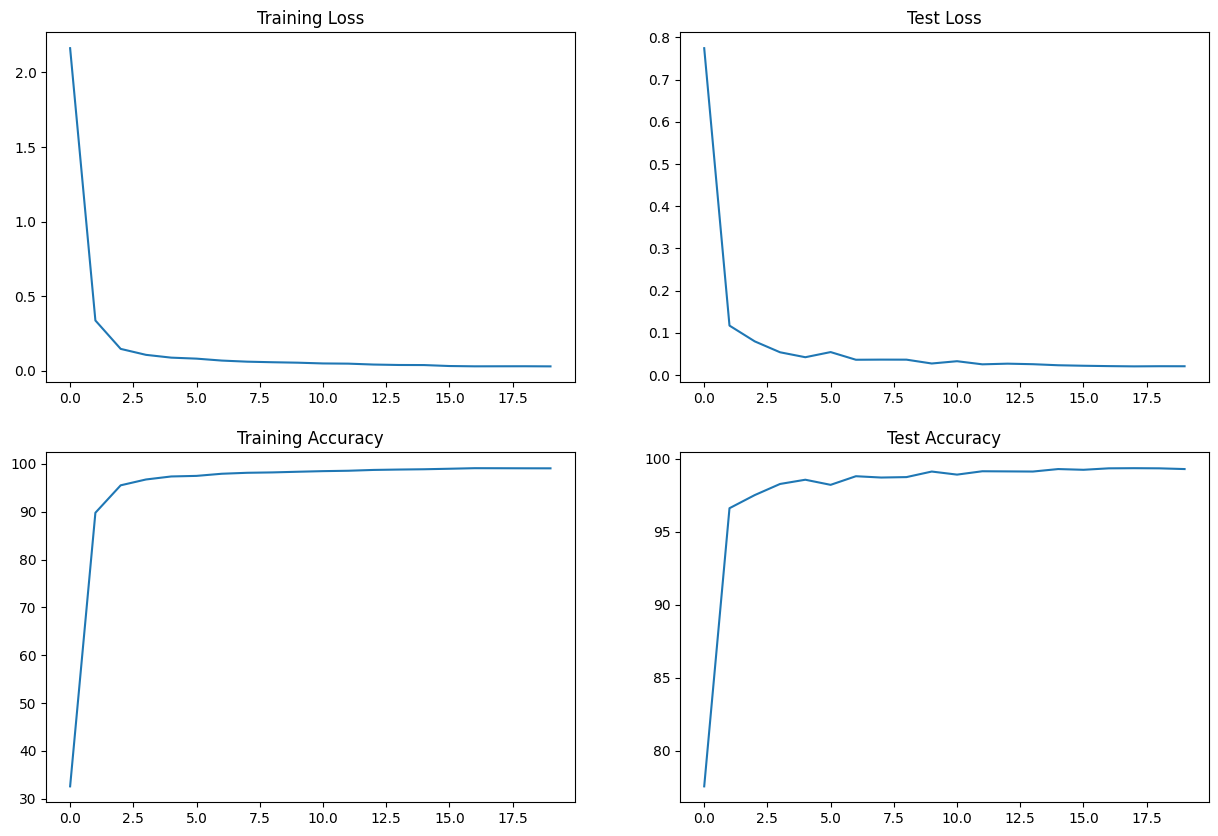

In [10]:
utils.valid_accuracy_loss_plots(train_losses,train_acc,test_losses,test_acc)